<a href="https://colab.research.google.com/github/JacobWilliams370/cs167_notes/blob/main/Day04_P2_Metrics_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day04 
## Part 2: Graphs, Metrics, and Testing

#### CS167: Machine Learning, J-Term 2023

Friday, January 6th, 2023 -- Session II (10:20 - 11:35)

[⏮ Day03 Part 2](https://github.com/merriekay/j23_cs167_notes/blob/main/Day03_P2_Missing_Data_Normalization.ipynb) | [Day03 Part 2⏩]()

## Helpful Links:
📆 [Course Schedule](https://docs.google.com/spreadsheets/d/e/2PACX-1vStj3FCEJqloUMLn2VtHa4yy1ILY6WvABhu4jd4cVUpPGkrx1mEjfTFmd77DMESR9HJ-8UBxgMDJL06/pubhtml?gid=0&single=true) | 🙋[PollEverywhere](https://pollev.com/meredithmoore011) | 📜 [Syllabus](https://analytics.drake.edu/~moore/j23_cs167/Syllabus.html)


# Overview of Today:

__Part 1__: Notebook #2 Questions, weighted kNN

__Part 2__: Graphs, Metrics, and Testing

# Admin Stuff

You should be working on:
- [Notebook #2: kNN and Normalization](https://classroom.github.com/a/ZihGOnY-) is released today, but will be due on Friday 1/6 by 11:59pm.
- Quiz #1 will be released today after class and will be due Monday 1/9/23 by 11:59pm. 
    - Blackboard
    - To be completed individually
    - Cite any external resoucres you use, please.


# 💬 Discussion Question

## Should we __always__ normalize our data? Why or why not?

normalizing makes data less interpretable, so if you need the data to be interpretable normalizing may not be the best course of action.

comparing two different datasets, normalizing may help 

if your variables have large spread, you will want to normalize, for example, in the vehicles dataset year will always have a larger weight than displ or cylinders

When does it make sense to normalize? When might it make more sense not to?

# ✨ New Material

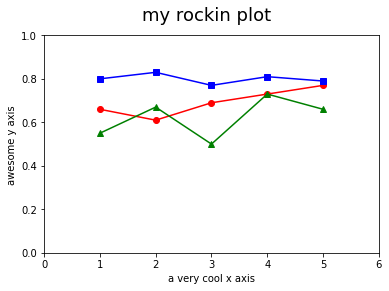

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

#define our data
xvals = [1,2,3,4,5]
series1 = [0.66,0.61,0.69,0.73,0.77]
series2 = [0.8,0.83,0.77,0.81,0.79]
series3 = [0.55,0.67,0.5,0.73,0.66]

#add titles to axis and graph
plt.suptitle('my rockin plot', fontsize=18)
plt.xlabel('a very cool x axis')
plt.ylabel('awesome y axis')

#plot the data
plt.plot(xvals, series1, 'ro-', label='1st series')
plt.plot(xvals, series2, 'bs-', label='2nd series')
plt.plot(xvals, series3, 'g^-', label='3rd series')
plt.axis([0,6,0,1]) #[x_min, x_max, y_min, y_max]
plt.show()

## Use markers to differentiate your series:

In [ ]:
%%html
<iframe src="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html" width="1000" height="350"></iframe>

# A simple example:

In [6]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


ValueError: ignored

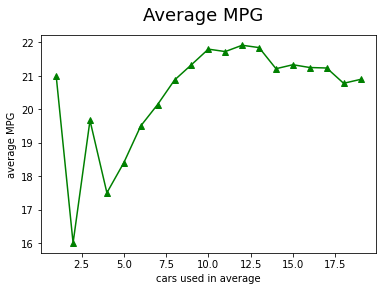

In [14]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/CS167/datasets/vehicles.csv')
pd.set_option('display.max_columns', 100)
gas_vehicles = data[data['fuelType']=='Regular']

# a silly function that returns the average MPG for the first k cars in the df
def getAverageMPG(data, k):
    return data["comb08"].iloc[0:k].mean()
def getMedianMPG(data, k):
    return data["comb08"].iloc[0:k].median()
number_of_points = 20

#populate the series list
series = []
series1 = []
for i in range(1, number_of_points):
    val1 = getAverageMPG(gas_vehicles, i)
    val2 = getMedianMPG(gas_vehicles, i)
    series.append(val1)
    series1.append(val2)

#plot it!
xvals = range(1, number_of_points)
plt.suptitle('Average MPG', fontsize=18)
plt.xlabel('cars used in average')
plt.ylabel('average MPG')
plt.plot(xvals, series, 'g-^', label='MPG')
plt.plot(xvals, series2, 'r-o', label = 'Median MPG')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, number_of_points, 10,35])
plt.show()

# 💬 Group Exercise #1:

Given the code from the previous slide:
- change the number of points to 20
- change the line to green triangles
- also plot the median (red dots)

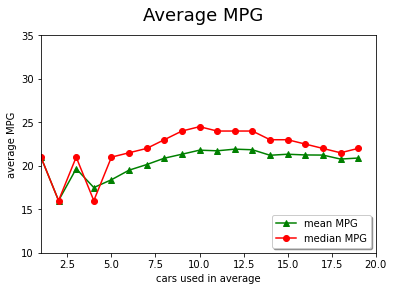

In [ ]:
# can you re-create this?

# Testing

# How do we know if our model is a 'good' model?

We want to know how good our models are at making predictions... how can we test it? 

Examples:
- what k-value should we use in knn algorithm?
- what is the effect on accuracy if I normalize the data?
- Should I use a weighted knn algorithm or a normal knn?

## Evaluation of Machine Learning Algorithms:

We wnat to know how good our model is at making predictions. How can we test it? 

__Option 1:__ Deploy the model in a live setting and see how it does on new examples.

__Option 2:__ Run each of our training examples through the model and see how many it gets correct

__Option 3:__ Cross-Validation - set aside some of your training examples to be used for testing.
- don't use testing examples when you train the model, only the rest that were left over. Why?

## Cross-Validation

Don't train the model on the testing data!

<div>
<img src="https://github.com/merriekay/j23_cs167_notes/blob/main/images/day04_cross_validation.png?raw=1" width=600/>
</div>

## Cross-Validation Code:

A good rule of thumb is that we like to train our model with 80% of the training examples, and test it on 20% of the training examples.

Splitting datasets into training and testing sets with a Pandas DataFrame:

In [19]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/CS167/datasets/irisData.csv')

#shuffle the data "sampling" the full set in random order
shuffled_data = data.sample(frac=1, random_state=41)

#use the first 20 rows in the shuffled set as testing data 
#train with the rest.
test_data = shuffled_data.iloc[0:20]
train_data = shuffled_data.iloc[20:]
train_data.shape

(130, 5)

## Cross-Validation Metrics:

When doing cross-validation, how do we tell how well our model performed?

How can we measure it?

- depends on the task and what we want to know. 

### Classification metrics are different than regression metrics

## Classification Metrics: `Accuracy`

__Accuracy__: The fraction of test examples your model predicted correctly

*Example*: 17 out of 20 = 0.85 accuracy

### Issues with accuracy:
- Suppose that a blood test for cancer has 99% accuracy
    - *can we safely assume this is a really good test?*
        -  If the dataset is *unbalanced*, accuracy is not a reliable metric for the real performance of a classifier because it will yield misleading results.
        - __Example__: Most people don’t have cancer.

    - Beware of what your metrics don't tell you. 

- What about __false negatives__ and __false positives__?
    - __false negative__: a test result which incorrectly indicates that a particular condition or attribute is absent
    - __false positives__: a test result which incorrectly indicates that a particular condition or attribute is present

## Classification Metrics: `Confusion Matrix`

__confusion matrix__: A specific table layout that allows the visualiztion of the performance of an algorithm. Each row represents instances in an actual class while each column represents the instances in a predicted class. 
- It makes it easy to see where your model is confusing the predicted and actual results


<div>
<img src="https://github.com/merriekay/j23_cs167_notes/blob/main/images/day04_iris_confusionmatrix.png?raw=1" width=600/>
</div>


<div>
<img src="https://github.com/merriekay/j23_cs167_notes/blob/main/images/day04_pretty_confusionmatrix.png?raw=1" width=600/>
</div>

## Confusion Matrix Exercise:

Given the following confusion matrix:
- how many false positive?

2
- how many false negatives

3
- what is the accuracy?

95% (95/100)


<div>
<img src="https://github.com/merriekay/j23_cs167_notes/blob/main/images/day04_confusionmatrix_ex.png?raw=1" width=400/>
</div>


# Classification v Regression:

What's the difference?

The output variable in __regression__ is numerical (or continuous).

The output variable in __classification__ is categorical (or discrete). 

### Is accuracy a good metric for regression? Why or why not?

No, accuracy is binary. You either get it right or wrong. It doesn't measure how close you are, but in regression we care about how close we get to what we're predicting, which is why accuracy isn't a good metric for regression.

# Regression Metrics: `Mean Absolute Error (MAE)`

__Mean Absolute Error (MAE)__: the average difference between the actual and predicted target values. 

<div>
<img src="https://github.com/merriekay/j23_cs167_notes/blob/main/images/day04_mae.png?raw=1"/>
</div>


<div>
<img src="https://github.com/merriekay/j23_cs167_notes/blob/main/images/day04_mae_calc.png?raw=1"/>
</div>


## Regression Metrics: `Mean Squared Error (MSE)`

__Mean Squared Error__: The average squared difference between the actual and predicted targets.

<div>
<img src="https://github.com/merriekay/j23_cs167_notes/blob/main/images/day04_mse.png?raw=1"/>
</div>


<div>
<img src="https://github.com/merriekay/j23_cs167_notes/blob/main/images/day04_mse_calc.png?raw=1"/>
</div>


## MAE v MSE:

What effect does the squaring have on the error measurements?

It is harsher and will generally be larger than MAE

Can you think of any scenarios where it might be better to use `MAE` over `MSE` or vis versa?


## Regression Metrics: $R^2$

Consider this naive prediction method: always predict the average target value

Do you think this is a good predictor algorithm? 

No. 

So, we should be able to beat it-- if we can't, we're in trouble. However, we can use this as a point of comparison.
- An $R^2$ values of 0 menas that you have done no better than the naive strategy of predicting the average

## Interpreting $R^2$

Things you should know:
- Usually $R^2$ values fall between 0 and 1
- 1 means you perfectly fit the data
- 0 means you've done no better than average
- Negative numbers mean that the naive model that predicts the average is actually a better predictor--yours is really bad. 